In [4]:
# 학습 데이터(Training Data) : 현실세계에 있는 실제 데이터, 예측자 혹은 분류자에게 실제 값을 알려주는 역할 
import numpy as np

# 학습 데이터
widths = np.array([3.0, 1.0])
lengths = np.array([1.0, 3.0])
for index, (width, length) in enumerate(zip(widths, lengths)):
    print("학습데이터{} 너비:{}, 길이:{}".format(index+1, width, length))
    
import matplotlib.pyplot as plt
# 시각화를 위한 함수
def show_data(widths, lengths):
    # Scatter Plot
    plt.scatter(widths, lengths, color=("r", "b"))
    plt.xlabel("width")
    plt.ylabel("length")

학습데이터1 너비:3.0, 길이:1.0
학습데이터2 너비:1.0, 길이:3.0


분류자에 대한 예측치:0.75, 목표치:1.1
분류자에 대한 오차: 0.3500000000000001


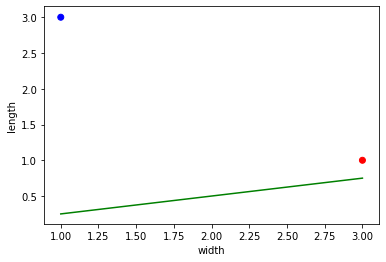

In [14]:
# 기본 가중치 0.25 설정
w = 0.25
# 예측을 위한 공식 : 0.25 * x
show_data(widths, lengths)

# 분류선을 긋기 위한 함수 생성
def show_classifier(weight, x):
    r = [x[0], x[1]]
    y_ = [weight * x[0], weight * x[1]]
    plt.plot(r, y_, color="green")

# 초기 가중치로 분류선 그어보기
show_classifier(w, widths)

# 첫번째 곤충에 대한 예측치 구하기
target = lengths[0] + lengths[0] * 0.1 # 목표치
predict = w * widths[0] # 예측치
print("분류자에 대한 예측치:{}, 목표치:{}".format(predict, target))
e = target - predict # 오차
print("분류자에 대한 오차:", e)

Delta: 0.1166666666666667
변경된 가중치: 0.3666666666666667


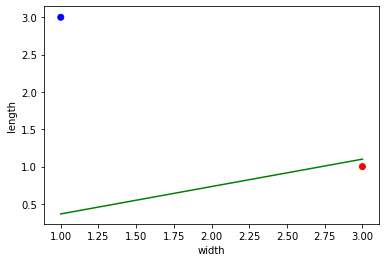

In [18]:
# 델타 구하기
delta = e / widths[0]
print("Delta:", delta)
# 델타 값을 이용해서 가중치를 1차 업데이트 
w2 = w + delta # 가중치 1차 업데이트 
print("변경된 가중치:", w2)
show_data(widths, lengths)
show_classifier(w2, widths)

분류자에 대한 예측값:0.3666666666666667, 목표치:2.7
2차 학습에 의한 델타: 2.3333333333333335
2차 갱신된 가중치: 2.7


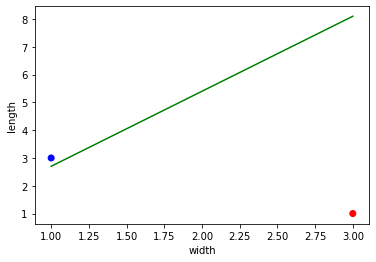

In [22]:
# 두번째 학습 데이터로 학습
target2 = lengths[1]-lengths[1]*0.1 # 목표치를 약간 낮게 설정
predict2 = w2 * widths[1]
# 오차 
e2 = target2 - predict2
print("분류자에 대한 예측값:{}, 목표치:{}".format(predict2, target2))
# delta 구하기
delta2 = e2 / widths[1]
print("2차 학습에 의한 델타:", delta2)
# 가중치 1차 업데이트 
w3 = w2 + delta2
print("2차 갱신된 가중치:", w3)

show_data(widths, lengths)
show_classifier(w3, lengths)

분류자에 의한 예측치:0.3666666666666667, 목표치:2.7
학습률 포함 2차 학습에 의한 델타: 1.1666666666666667
갱신된 가중치: 1.5333333333333334


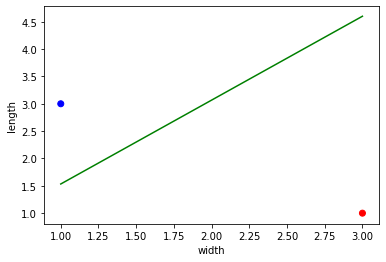

In [26]:
# 한꺼번에 많은 변화가 있었으므로 2차 갱신을 다시 시도, Learning Rate(학습률) 도입
target2 = lengths[1] - lengths[1] * 0.1
predict2 = w2 * widths[1] # 예측치
e2 = target2 - predict2
print("분류자에 의한 예측치:{}, 목표치:{}".format(predict2, target2))

L = 0.5 # 학습률 : 조정을 하지 안했을 때에 비해 1/2을 업데이트
delta2 = L * (e2 / widths[1]) # 학습률 적용 수식
print("학습률 포함 2차 학습에 의한 델타:", delta2)

# 가중치 업데이트 
w3 = w2 + delta2
print("갱신된 가중치:", w3)

show_data(widths, lengths)
show_classifier(w3, lengths)

# 획득한 모델 : y = 1.53 * x 정도의 가중치 

1번째 학습(Epoch):가중치 0.5, 오차 0.23333333333333336
2번째 학습(Epoch):가중치 0.7333333333333334, 오차 0.18666666666666665
3번째 학습(Epoch):가중치 0.92, 오차 0.14933333333333332
4번째 학습(Epoch):가중치 1.0693333333333332, 오차 0.11946666666666671
5번째 학습(Epoch):가중치 1.1887999999999999, 오차 0.09557333333333336
6번째 학습(Epoch):가중치 1.2843733333333331, 오차 0.0764586666666667
7번째 학습(Epoch):가중치 1.3608319999999998, 오차 0.06116693333333339
8번째 학습(Epoch):가중치 1.4219989333333332, 오차 0.048933546666666695
9번째 학습(Epoch):가중치 1.4709324799999999, 오차 0.03914683733333338
10번째 학습(Epoch):가중치 1.5100793173333333, 오차 0.03131746986666666
11번째 학습(Epoch):가중치 1.5413967872, 오차 0.025053975893333316
12번째 학습(Epoch):가중치 1.5664507630933333, 오차 0.020043180714666667
13번째 학습(Epoch):가중치 1.586493943808, 오차 0.016034544571733346
14번째 학습(Epoch):가중치 1.6025284883797333, 오차 0.012827635657386694
15번째 학습(Epoch):가중치 1.61535612403712, 오차 0.010262108525909364
16번째 학습(Epoch):가중치 1.6256182325630293, 오차 0.008209686820727492
17번째 학습(Epoch):가중치 1.6338279193837568, 오차 0.00656774

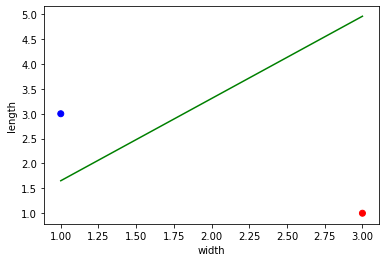

In [42]:
# 약간의 정리 : 실제로는 개별 학습데이터로 개별 업데이트를 진행하진 않음
# 전체 데이터를 기반으로 "여러 차례" 학습을 진행한다 
def train(var, target, w, learning_rate=0.1):
    # var:값(Feature), target:목표치, w:초기가중치, learning_rate:학습률
    for i in range(1, 21): # 여러차례 학습을 진행
        e = learning_rate * np.sum((target - w * var) / var)
        print("{}번째 학습(Epoch):가중치 {}, 오차 {}".format(i, w, e))
        # 가중치 업데이트 
        w += e
    # 최종 학습된 가중치 반환
    return w 

# 학습 시작 
classifier = train(widths, lengths, 0.5) # 초기가중치 0.5, 학습률 0.5
# 학습이후 얻어낸 최종 분류자의 가중치 
print("최종 가중치:", classifier)

show_data(widths, lengths)
show_classifier(classifier, widths)

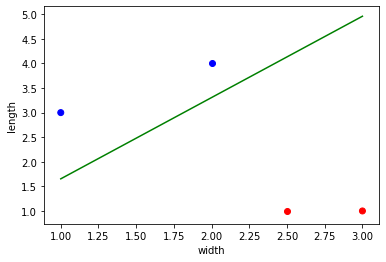

In [47]:
# classifier를 이용하여 선을 그었을 때, 분류선보다 크면 곤충 2, 작으면 곤충 1로 구분
def classify(classifier, insect):
    plt.scatter(insect['width'], insect['length'], color="r" if classifier * insect['width'] - insect['length'] > 0 else "b")

show_data(widths, lengths)
show_classifier(classifier, widths)

# 새로운 관측치의 분류
new_insect =  {"width": 2.0, "length": 4.0}
classify(classifier, new_insect)
classify(classifier, {"width":2.5, "length":1.0})